In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp

In [3]:
df=pd.read_csv("/content/car_sales.csv")
df

,Unnamed: 0,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,Cylinders,EngineSize,Horsepower,RPM,Rev.per.mile,Man.trans.avail,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,1,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,Front,4,1.8,140,6300,2890,Yes,13.2,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
1,2,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,Front,6,3.2,200,5500,2335,Yes,18.0,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend
2,3,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,Front,6,2.8,172,5500,2280,Yes,16.9,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90
3,4,Audi,100,Midsize,30.8,37.7,44.6,19,26,Driver & Passenger,Front,6,2.8,172,5500,2535,Yes,21.1,6,193,106,70,37,31.0,17.0,3405,non-USA,Audi 100
4,5,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,Rear,4,3.5,208,5700,2545,Yes,21.1,4,186,109,69,39,27.0,13.0,3640,non-USA,BMW 535i
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,89,Volkswagen,Eurovan,Van,16.6,19.7,22.7,17,21,None,Front,5,2.5,109,4500,2915,Yes,21.1,7,187,115,72,38,34.0,NaN,3960,non-USA,Volkswagen Eurovan
89,90,Volkswagen,Passat,Compact,17.6,20.0,22.4,21,30,None,Front,4,2.0,134,5800,2685,Yes,18.5,5,180,103,67,35,31.5,14.0,2985,non-USA,Volkswagen Passat
90,91,Volkswagen,Corrado,Sporty,22.9,23.3,23.7,18,25,None,Front,6,2.8,178,5800,2385,Yes,18.5,4,159,97,66,36,26.0,15.0,2810,non-USA,Volkswagen Corrado
91,92,Volvo,240,Compact,21.8,22.7,23.5,21,28,Driver only,Rear,4,2.3,114,5400,2215,Yes,15.8,5,190,104,67,37,29.5,14.0,2985,non-USA,Volvo 240


In [4]:
df.head()

,Unnamed: 0,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,Cylinders,EngineSize,Horsepower,RPM,Rev.per.mile,Man.trans.avail,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,1,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,Front,4,1.8,140,6300,2890,Yes,13.2,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
1,2,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,Front,6,3.2,200,5500,2335,Yes,18.0,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend
2,3,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,Front,6,2.8,172,5500,2280,Yes,16.9,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90
3,4,Audi,100,Midsize,30.8,37.7,44.6,19,26,Driver & Passenger,Front,6,2.8,172,5500,2535,Yes,21.1,6,193,106,70,37,31.0,17.0,3405,non-USA,Audi 100
4,5,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,Rear,4,3.5,208,5700,2545,Yes,21.1,4,186,109,69,39,27.0,13.0,3640,non-USA,BMW 535i


In [5]:
data=df
data.isna()
data.isnull()


,Unnamed: 0,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,Cylinders,EngineSize,Horsepower,RPM,Rev.per.mile,Man.trans.avail,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
89,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
90,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
91,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [6]:
data['MPG.city']=235/df['MPG.city']
print(data.columns)

Index(['Unnamed: 0', 'Manufacturer', 'Model', 'Type', 'Min.Price', 'Price',
       'Max.Price', 'MPG.city', 'MPG.highway', 'AirBags', 'DriveTrain',
       'Cylinders', 'EngineSize', 'Horsepower', 'RPM', 'Rev.per.mile',
       'Man.trans.avail', 'Fuel.tank.capacity', 'Passengers', 'Length',
       'Wheelbase', 'Width', 'Turn.circle', 'Rear.seat.room', 'Luggage.room',
       'Weight', 'Origin', 'Make'],
      dtype='object')


In [7]:
data.dtypes

Unnamed: 0              int64
Manufacturer           object
Model                  object
Type                   object
Min.Price             float64
Price                 float64
Max.Price             float64
MPG.city              float64
MPG.highway             int64
AirBags                object
DriveTrain             object
Cylinders              object
EngineSize            float64
Horsepower              int64
RPM                     int64
Rev.per.mile            int64
Man.trans.avail        object
Fuel.tank.capacity    float64
Passengers              int64
Length                  int64
Wheelbase               int64
Width                   int64
Turn.circle             int64
Rear.seat.room        float64
Luggage.room          float64
Weight                  int64
Origin                 object
Make                   object
dtype: object

In [8]:
data.Price.unique()
data=data[data.Price!='?']
data.dtypes

Unnamed: 0              int64
Manufacturer           object
Model                  object
Type                   object
Min.Price             float64
Price                 float64
Max.Price             float64
MPG.city              float64
MPG.highway             int64
AirBags                object
DriveTrain             object
Cylinders              object
EngineSize            float64
Horsepower              int64
RPM                     int64
Rev.per.mile            int64
Man.trans.avail        object
Fuel.tank.capacity    float64
Passengers              int64
Length                  int64
Wheelbase               int64
Width                   int64
Turn.circle             int64
Rear.seat.room        float64
Luggage.room          float64
Weight                  int64
Origin                 object
Make                   object
dtype: object

0        Low
1     Medium
2     Medium
3     Medium
4     Medium
       ...  
88       Low
89       Low
90       Low
91       Low
92    Medium
Name: price_binned, Length: 93, dtype: category
Categories (3, object): ['Low' < 'Medium' < 'High']


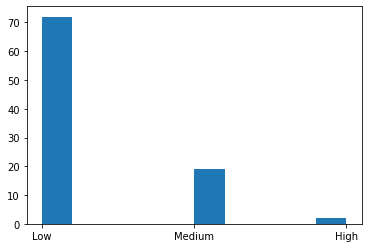

In [9]:
data['Length']=data['Length']/data['Length'].max()
data['Width']=data['Width']/data['Width'].max()
bins=np.linspace(min(data['Price']),max(data['Price']),4)
group_names=['Low','Medium','High']       
data['price_binned']=pd.cut(data['Price'],bins,labels=group_names,include_lowest=True)
print(data['price_binned'])
plt.hist(data['price_binned'])
plt.show()

In [10]:
data.describe()


,Unnamed: 0,Min.Price,Price,Max.Price,MPG.city,MPG.highway,EngineSize,Horsepower,RPM,Rev.per.mile,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight
count,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,91.000000,82.000000,93.000000
mean,47.000000,17.125806,19.509677,21.898925,11.043231,29.086022,2.667742,143.827957,5280.645161,2332.204301,16.664516,5.086022,0.836549,103.946237,0.889440,38.956989,27.829670,13.890244,3072.903226
std,26.990739,8.746029,9.659430,11.030457,2.266215,5.331726,1.037363,52.374410,596.731690,496.506525,3.279370,1.038979,0.066678,6.819674,0.048449,3.223265,2.989072,2.997967,589.896510
min,1.000000,6.700000,7.400000,7.900000,5.108696,20.000000,1.000000,55.000000,3800.000000,1320.000000,9.200000,2.000000,0.643836,90.000000,0.769231,32.000000,19.000000,6.000000,1695.000000
25%,24.000000,10.800000,12.200000,14.700000,9.400000,26.000000,1.800000,103.000000,4800.000000,1985.000000,14.500000,4.000000,0.794521,98.000000,0.858974,37.000000,26.000000,12.000000,2620.000000
50%,47.000000,14.700000,17.700000,19.600000,11.190476,28.000000,2.400000,140.000000,5200.000000,2340.000000,16.400000,5.000000,0.835616,103.000000,0.884615,39.000000,27.500000,14.000000,3040.000000
75%,70.000000,20.300000,23.300000,25.300000,13.055556,31.000000,3.300000,170.000000,5750.000000,2565.000000,18.800000,6.000000,0.876712,110.000000,0.923077,41.000000,30.000000,15.000000,3525.000000
max,93.000000,45.400000,61.900000,80.000000,15.666667,50.000000,5.700000,300.000000,6500.000000,3755.000000,27.000000,8.000000,1.000000,119.000000,1.000000,45.000000,36.000000,22.000000,4105.000000


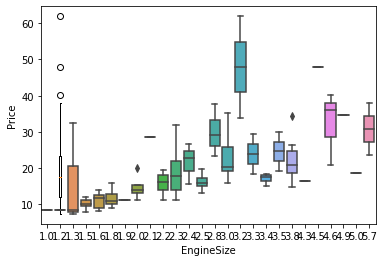

In [11]:
plt.boxplot(data['Price'])
sns.boxplot(x='EngineSize',y='Price',data=data)
plt.show()

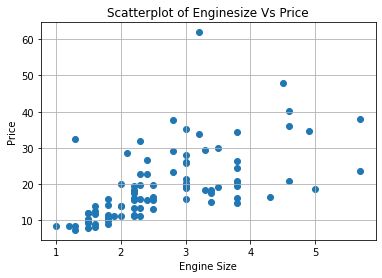

In [12]:
plt.scatter(data['EngineSize'],data['Price'])
plt.title('Scatterplot of Enginesize Vs Price')
plt.xlabel('Engine Size')
plt.ylabel('Price')
plt.grid()
plt.show()

In [13]:
test=data[['Wheelbase','Price','Weight']]
data_grp=data.groupby(['Wheelbase','Weight'],as_index=False).mean()
data_grp

,Wheelbase,Weight,Unnamed: 0,Min.Price,Price,Max.Price,MPG.city,MPG.highway,EngineSize,Horsepower,RPM,Rev.per.mile,Fuel.tank.capacity,Passengers,Length,Width,Turn.circle,Rear.seat.room,Luggage.room
0,90,1845,31.0,6.9,7.4,7.9,7.580645,33.0,1.3,63.0,5000.0,3150.0,10.0,4.0,0.643836,0.807692,33.0,26.0,12.0
1,90,2045,80.0,7.3,8.4,9.5,7.121212,37.0,1.2,73.0,5600.0,2875.0,9.2,4.0,0.666667,0.769231,32.0,23.5,10.0
2,93,1695,39.0,6.7,8.4,10.0,5.108696,50.0,1.0,55.0,5700.0,3755.0,10.6,4.0,0.689498,0.807692,34.0,27.5,10.0
3,93,1965,83.0,7.3,8.6,10.0,6.025641,43.0,1.3,70.0,6000.0,3360.0,10.6,4.0,0.735160,0.807692,34.0,27.5,10.0
4,93,2240,88.0,8.7,9.1,9.5,9.400000,33.0,1.8,81.0,5500.0,2550.0,12.4,4.0,0.744292,0.807692,34.0,26.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,115,3960,89.0,16.6,19.7,22.7,13.823529,21.0,2.5,109.0,4500.0,2915.0,21.1,7.0,0.853881,0.923077,38.0,34.0,NaN
85,116,3910,18.0,18.0,18.8,19.6,13.823529,26.0,5.0,170.0,4200.0,1350.0,23.0,6.0,0.977169,0.987179,42.0,29.5,20.0
86,116,4105,8.0,22.6,23.7,24.9,14.687500,25.0,5.7,180.0,4000.0,1320.0,23.0,6.0,0.986301,1.000000,45.0,30.5,21.0
87,117,4055,52.0,34.4,36.1,37.8,13.055556,26.0,4.6,210.0,4600.0,1840.0,20.0,6.0,1.000000,0.987179,45.0,31.5,22.0


In [14]:
data_pivot=data_grp.pivot(index='Wheelbase',columns='Weight')
data_pivot

Unnamed: 0                          ... Luggage.room                      
Weight          1695  1845  1965  2045  2055  ...         4000 4025  4055 4100  4105
Wheelbase                                     ...                                   
90               NaN  31.0   NaN  80.0   NaN  ...          NaN  NaN   NaN  NaN   NaN
93              39.0   NaN  83.0   NaN   NaN  ...          NaN  NaN   NaN  NaN   NaN
94               NaN   NaN   NaN   NaN  84.0  ...          NaN  NaN   NaN  NaN   NaN
95               NaN   NaN   NaN   NaN   NaN  ...          NaN  NaN   NaN  NaN   NaN
96               NaN   NaN   NaN   NaN   NaN  ...          NaN  NaN   NaN  NaN   NaN
97               NaN   NaN   NaN   NaN   NaN  ...          NaN  NaN   NaN  NaN   NaN
98               NaN   NaN   NaN   NaN   NaN  ...          NaN  NaN   NaN  NaN   NaN
99               NaN   NaN   NaN   NaN   NaN  ...          NaN  NaN   NaN  NaN   NaN
100              NaN   NaN   NaN   NaN   NaN  ...          NaN  NaN   NaN  NaN   NaN
101              NaN   NaN   NaN   NaN   NaN  ...          NaN  NaN   NaN  NaN   NaN
102              NaN   NaN   NaN   NaN   NaN  ...          NaN  NaN   NaN  NaN   NaN
103              NaN   NaN   NaN   NaN   NaN  ...          NaN  NaN   NaN  NaN   NaN
104              NaN   NaN   NaN   NaN   NaN  ...          NaN  NaN   NaN  NaN   NaN
105              NaN   NaN   NaN   NaN   NaN  ...          NaN  NaN   NaN  NaN   NaN
106              NaN   NaN   NaN   NaN   NaN  ...          NaN  NaN   NaN  NaN   NaN
107              NaN   NaN   NaN   NaN   NaN  ...          NaN  NaN   NaN  NaN   NaN
108              NaN   NaN   NaN   NaN   NaN  ...          NaN  NaN   NaN  NaN   NaN
109              NaN   NaN   NaN   NaN   NaN  ...          NaN  NaN   NaN  NaN   NaN
110              NaN   NaN   NaN   NaN   NaN  ...          NaN  NaN   NaN  NaN   NaN
111              NaN   NaN   NaN   NaN   NaN  ...          NaN  NaN   NaN  NaN   NaN
112              NaN   NaN   NaN   NaN   NaN  ...          NaN  NaN   NaN  NaN   NaN
113              NaN   NaN   NaN   NaN   NaN  ...         15.0  NaN   NaN  NaN   NaN
114              NaN   NaN   NaN   NaN   NaN  ...          NaN  NaN   NaN  NaN   NaN
115              NaN   NaN   NaN   NaN   NaN  ...          NaN  NaN   NaN  NaN   NaN
116              NaN   NaN   NaN   NaN   NaN  ...          NaN  NaN   NaN  NaN  21.0
117              NaN   NaN   NaN   NaN   NaN  ...          NaN  NaN  22.0  NaN   NaN
119              NaN   NaN   NaN   NaN   NaN  ...          NaN  NaN   NaN  NaN   NaN

[27 rows x 1377 columns]

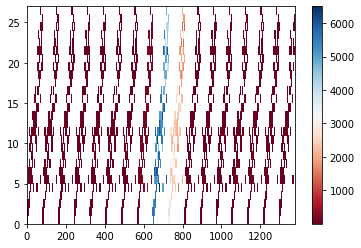

In [15]:
plt.pcolor(data_pivot,cmap='RdBu')
plt.colorbar()
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')